GLOBAL CRIME PREDICTION

Crime and insecurity has become one of the major global problems and source of worries to many nations and governments. The rate of crimes is on the rise in many nations of the world. Terriorism, homicide, suicide, violence, man-slaughter, drug abuse, gun abuse, robbery, frauds, cyber crimes, kidnapping, sexual assults, political unrest and other forms of crimes are threatening economic activities, economic growth, peace and progress of many nations. These may be common in the developing nations but the developed nations have not been spared, a number of them are having a fair share of the large scale and coordinated crimes.

Hence, the project seeks to develop a ML Model that will accurately predict crimes in different nations of the world so as to help the crime fighters prevent the crimes.

Using the United Nations' dataset on crimes from Kaggle, these are the objectives of the model:

What are the top 20 unsafe countries in the World?

what are the top 5 crimes in these 20 countries?

what is their rates of occurrence?

predict when these 5 crimes will occur

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sb  
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import datetime as dt 
import re 




In [ ]:
data=pd.read_csv('Crimes_UN_data.csv')

In [ ]:
data.head(5)

,Occurrence,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2015,"Intentional homicide rates per 100,000",5.3,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
1,202,Sub-Saharan Africa,2015,"Intentional homicide rates per 100,000",9.6,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
2,419,Latin America & the Caribbean,2015,"Intentional homicide rates per 100,000",22.3,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
3,62,South-central Asia,2015,"Intentional homicide rates per 100,000",3.7,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
4,53,Australia and New Zealand,2015,"Intentional homicide rates per 100,000",1,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Occurrence           3394 non-null   int64 
 1   Region/Country/Area  3394 non-null   object
 2   Year                 3394 non-null   int64 
 3   Series               3394 non-null   object
 4   Value                3394 non-null   object
 5   Footnotes            398 non-null    object
 6   Source               3394 non-null   object
dtypes: int64(2), object(5)
memory usage: 185.7+ KB


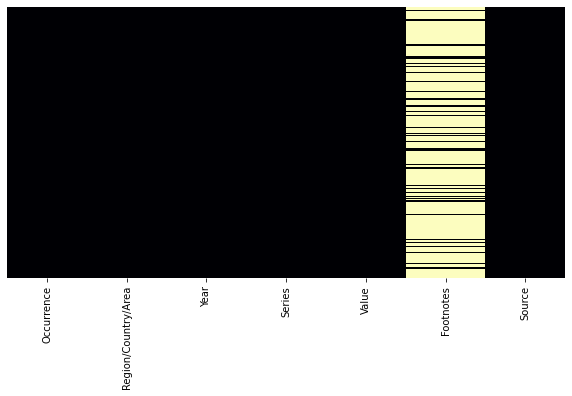

In [ ]:
plt.figure(figsize=(10,5))
sb.heatmap(data.isnull(), cmap='magma',yticklabels=False,cbar=False)
plt.show()

In [ ]:
data['Footnotes'].unique()

array(['Data is for 2015, or latest available data from 2010 onwards.',
       'Data is for 2015, or latest available data from 2010 onwards.;Excludes Australia and New Zealand.',
       nan, 'Break in the time series.',
       'Data refer to offences, not victims, of intentional homicide.',
       'For statistical purposes, the data for China do not include those for the Hong Kong Special Administrative Region (Hong Kong SAR), Macao Special Administrative Region (Macao SAR) and Taiwan Province of China.',
       'Estimate.', 'Excluding victims of terrorist attacks.',
       'Data refer to Central Iraq.',
       'Include victims of attempted homicide.',
       'England and Wales only.'], dtype=object)

Data Cleaning


In [ ]:
data['Value'] = data['Value'].apply(lambda x : x.replace(',',''))   # to replace ,
data['Value'] = data['Value'].apply(lambda x : float(x))   # to convert object(string data type) to float (decimal numbers)


In [ ]:
data.isnull()

,Occurrence,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3389,False,False,False,False,False,True,False
3390,False,False,False,False,False,True,False
3391,False,False,False,False,False,True,False
3392,False,False,False,False,False,True,False


In [ ]:
data.drop(data['Footnotes'].isnull().index,inplace=True)

In [ ]:
data.shape

(0, 7)

In [ ]:
data.isnull().sum()

Occurrence             0.0
Region/Country/Area    0.0
Year                   0.0
Series                 0.0
Value                  0.0
Footnotes              0.0
Source                 0.0
dtype: float64

Visualization

What are the 20 most unsafe countries due to crimes

In [ ]:
## Top 20 countries in crimes

toptwentycountry=[]
for country in data['Region/Country/Area'].unique():
    df=data[data['Region/Country/Area']==country]
    Summary= df['Value'].sum()
    toptwentycountry.append([country,Summary])

country=pd.DataFrame(toptwentycountry,columns=['Country', 'Value'])
country.sort_values(by = 'Value',ascending = False, inplace=True)

country


,Country,Value


In [ ]:
# Top 20 country according to sum of values
country[:20]

,Country,Value


In [ ]:
# Top 20 countries
top_20 = country.Country[:20]
top_20

Series([], Name: Country, dtype: object)

In [ ]:
# result dataframe with 5 rows(5 most common crime) for each of the top 20 countries

result = pd.DataFrame()
for i in top_20:
    top5 = data[data['Region/Country/Area'] == i].sort_values(by='Value', ascending = False)[:5]
    result = result.append(top5)

print(result)


Empty DataFrame
Columns: []
Index: []


In [ ]:
result

""
